# **数据可视化**

In [1]:
import pandas as pd # 数据操作库
import matplotlib.pyplot as plt # 基础绘图库（什么都能画，但可能慢、复杂）
import seaborn as sns # 数据可视化专用库（专门用来快速画数据图）


# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 读取数据
df = pd.read_excel("data\\tips.xlsx")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# 读取自己的数据集：seaborn-data文件夹中的dowjones.csv文件
df1 = pd.read_excel("data\\dowjones.xlsx")

# 使用Pandas将日期列转换为时间序列日期
df1["Date"] = pd.to_datetime(df1["Date"])

df1.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


## ***基于Matplotlib绘图基础***

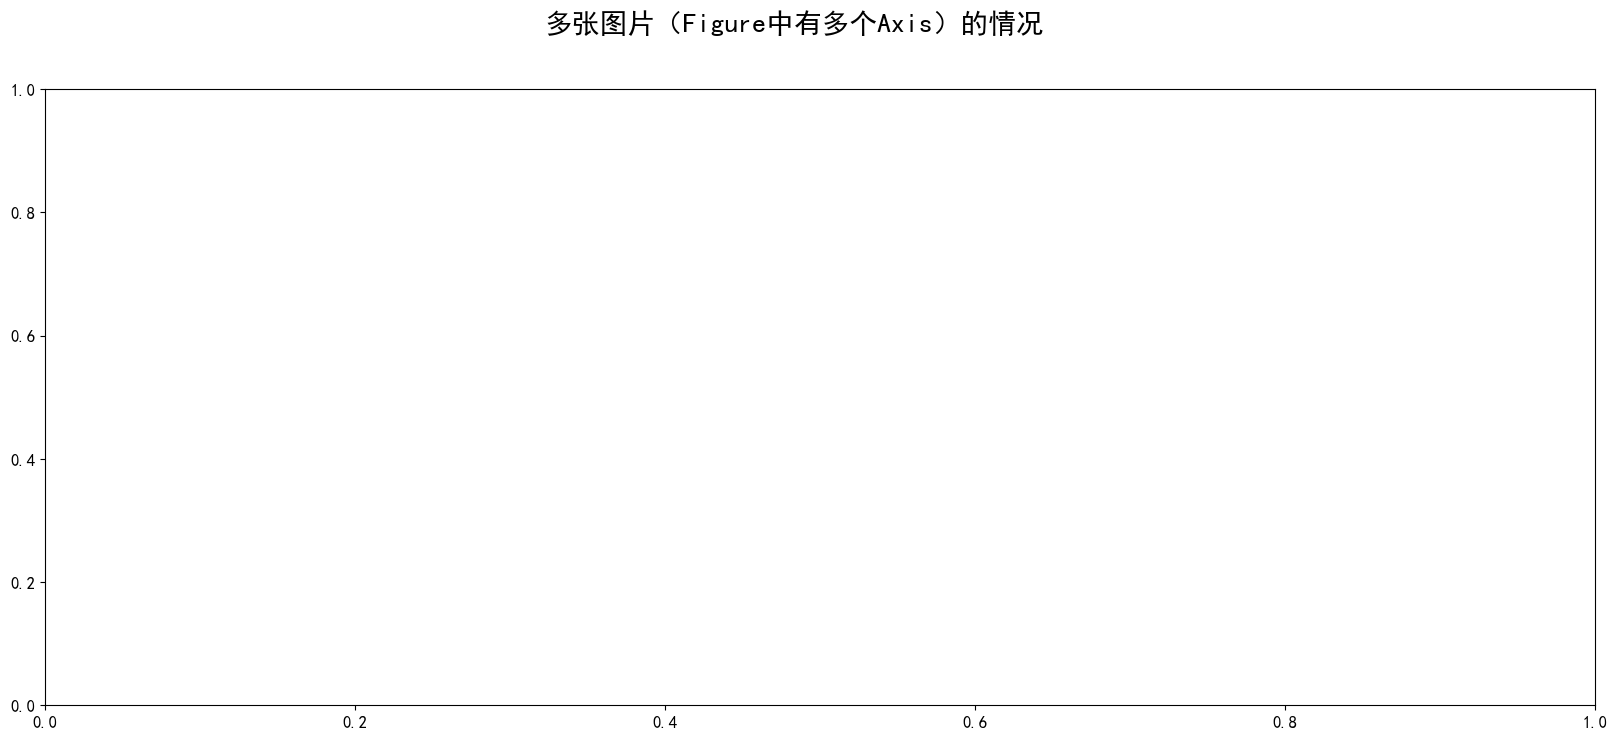

In [4]:
# Figure, Axis
fig, ax = plt.subplots(
                    nrows=1, ncols=1,         # 画布分成1*1个ax
                    figsize=(20, 8),         # 画布大小
                    sharex=True, sharey=True)  # 所有子图轴共享


fig.suptitle('多张图片（Figure中有多个Axis）的情况', fontsize=20)    # 画布的大标题

# 图片写入文件夹
fig.savefig("picture\\数据可视化示例-矢量图-eps.eps")
fig.savefig("picture\\数据可视化示例-标量图.png")
fig.savefig("picture\\数据可视化示例-标量图-svg.svg")

Text(0, 0.5, '图四y轴')

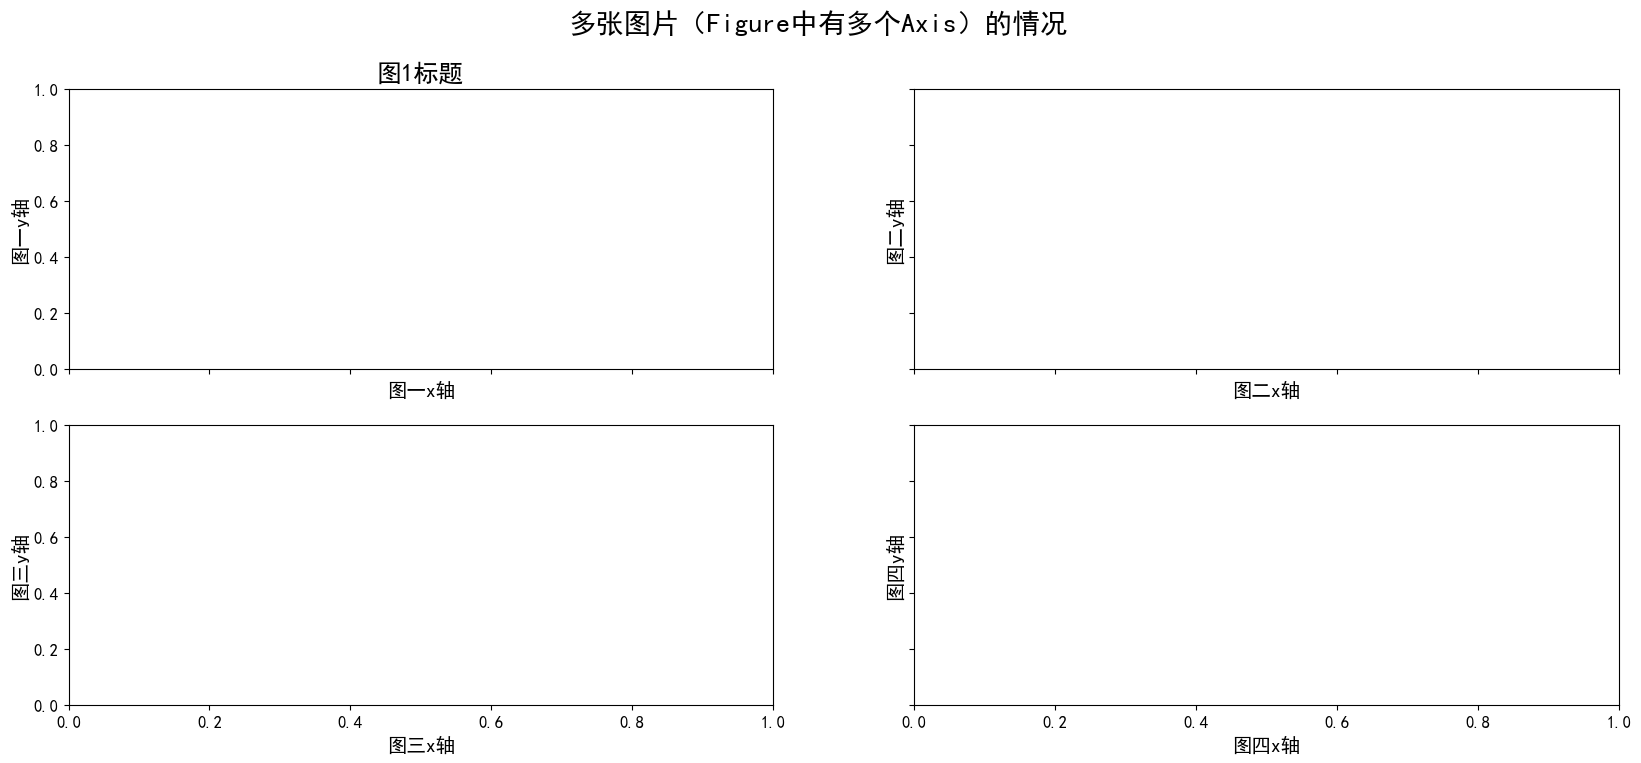

In [5]:
# Figure, Axis
fig, ax = plt.subplots(
                    nrows=2, ncols=2,         # 画布分成2*2个Ax
                    figsize=(20, 8),         # 画布大小
                    sharex=True, sharey=True)  # 所有子图轴共享

fig.subplots_adjust(
                    wspace=0.2,               # 同一行元素AX之间距离
                    hspace=0.2)               # 同一列元素AX之间距离

fig.suptitle('多张图片（Figure中有多个Axis）的情况', fontsize=20)    # 画布的大标题

ax[0][0].set_xlabel('图一x轴', fontsize=14)      # 设置x轴标题
ax[0][0].set_ylabel('图一y轴', fontsize=14)      # 设置y轴标题
ax[0][0].set_title('图1标题', fontsize=18)

ax[0][1].set_xlabel('图二x轴', fontsize=14)      
ax[0][1].set_ylabel('图二y轴', fontsize=14)     

ax[1][0].set_xlabel('图三x轴', fontsize=14)      
ax[1][0].set_ylabel('图三y轴', fontsize=14)      

ax[1][1].set_xlabel('图四x轴', fontsize=14)      
ax[1][1].set_ylabel('图四y轴', fontsize=14)    

## 重点可视化图汇总

### ***折线图与散点图：基于Matplotlib***

In [6]:
df1.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


Text(0, 0.5, '价格')

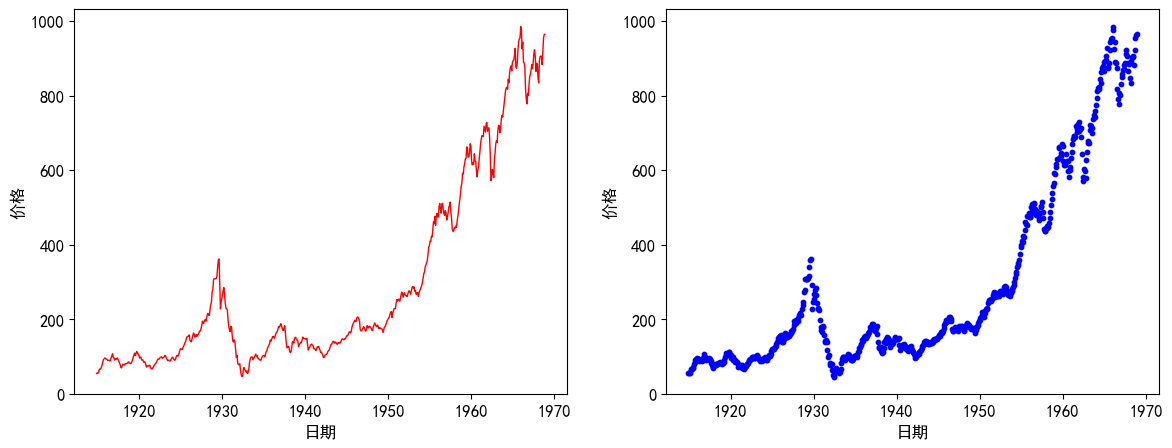

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax[0].plot(df1["Date"], df1["Price"], color="red", linewidth=1)
ax[1].scatter(df1["Date"], df1["Price"], color="blue", marker="o", s=10) 

ax[0].set_xlabel("日期")
ax[0].set_ylabel("价格")

ax[1].set_xlabel("日期")
ax[1].set_ylabel("价格")

### ***直方图：基于Seaborn***

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='Count'>

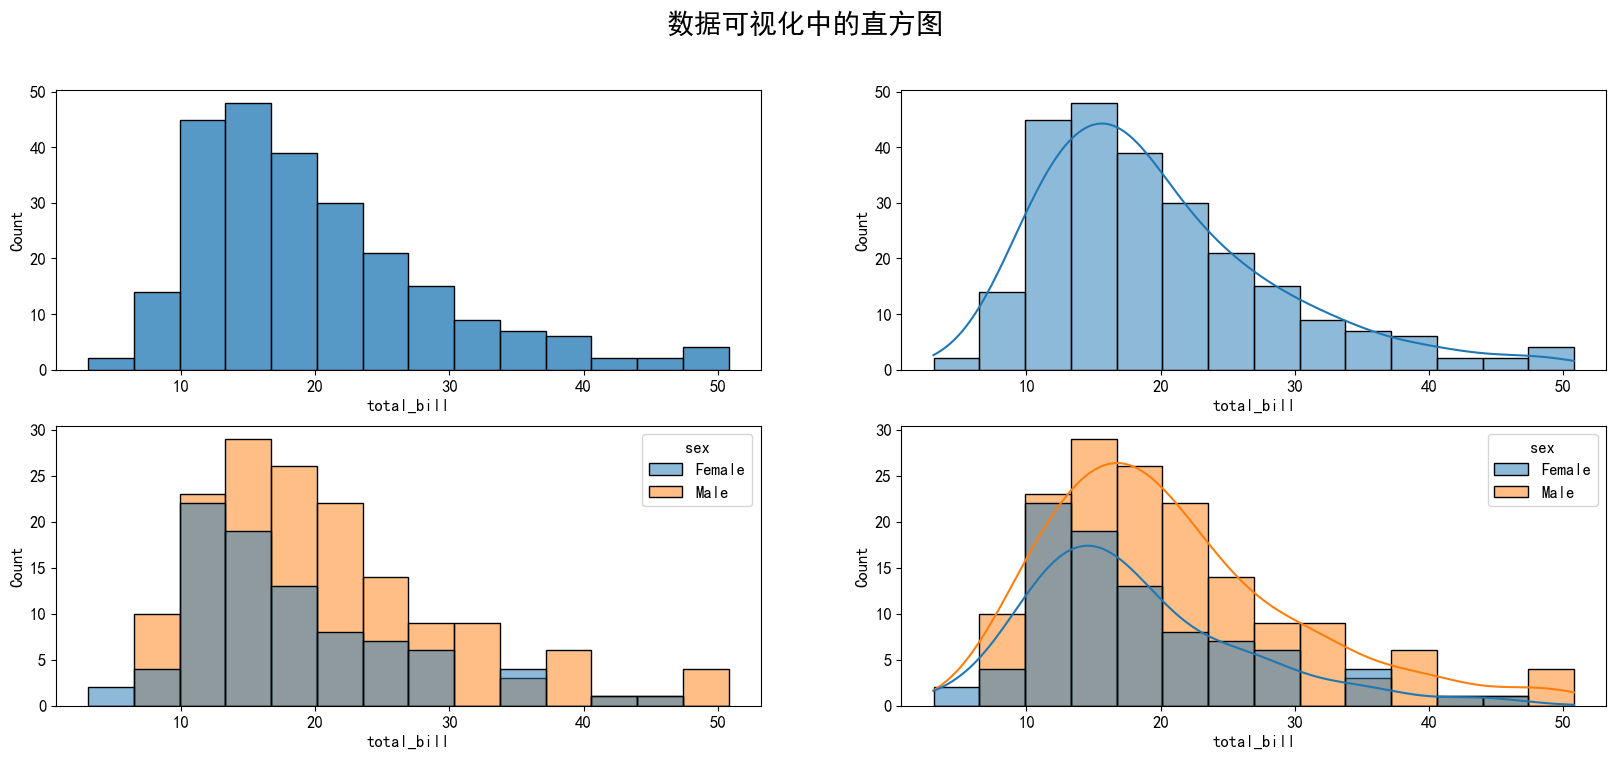

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
fig.suptitle('数据可视化中的直方图', fontsize=20)

sns.histplot(data=df, x="total_bill", ax=ax[0][0])
sns.histplot(data=df, x="total_bill", kde=True, ax=ax[0][1])  # 直方图+核线更加清楚的呈现了连续特征分布情况，建议使用这种而不是第一种
sns.histplot(data=df, x="total_bill", hue="sex", ax=ax[1][0])
sns.histplot(data=df, x="total_bill", hue="sex", kde=True, ax=ax[1][1])

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### ***条形统计图：基于Seaborn***

**注意：两个分类特征的多变量可视化分布分析非常有效！！！**

<Axes: xlabel='count', ylabel='time'>

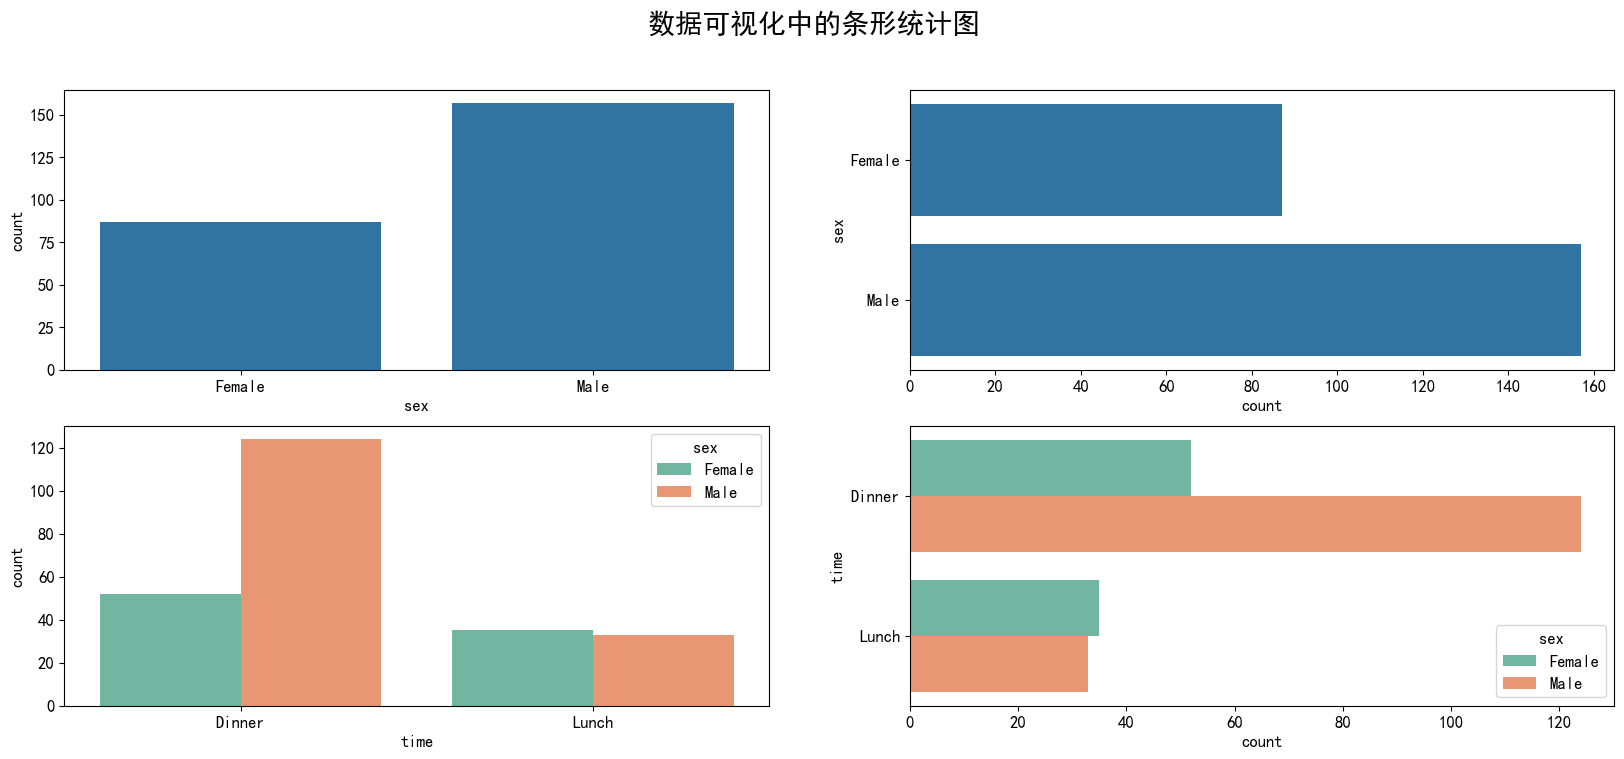

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
fig.suptitle('数据可视化中的条形统计图', fontsize=20) 
     
sns.countplot(x='sex', data=df, ax=ax[0][0])
sns.countplot(y='sex', data=df, ax=ax[0][1])
sns.countplot(x='time', hue="sex", palette='Set2', data=df, ax=ax[1][0])
sns.countplot(y='time', hue="sex", palette='Set2', data=df, ax=ax[1][1])

In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### ***散点图：基于Seaborn***

<Axes: xlabel='total_bill', ylabel='tip'>

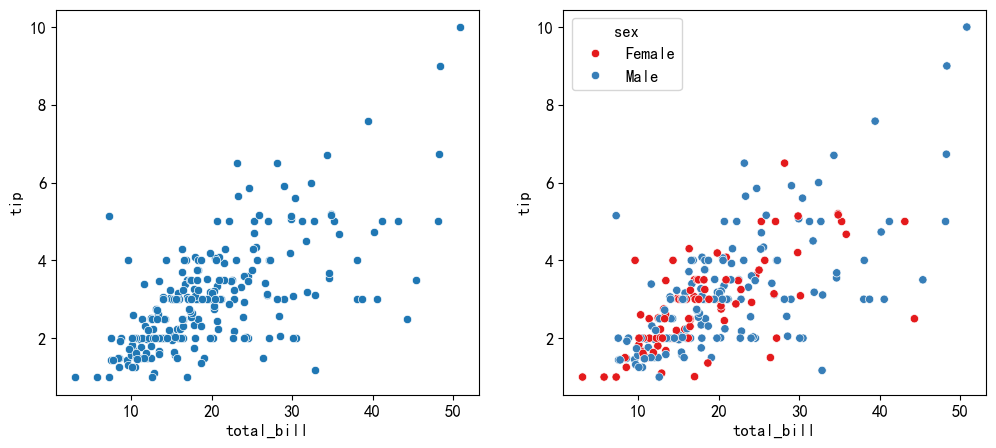

In [13]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 使用Seaborn的scatterplot函数绘制散点图，并通过ax参数指定使用Matplotlib的子图进行绘制
sns.scatterplot(data=df, x="total_bill", y="tip", ax=ax[0])
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex", palette='Set1', ax=ax[1])

### ***小提琴图 & 箱线图：基于Seaborn***

<Axes: xlabel='day', ylabel='total_bill'>

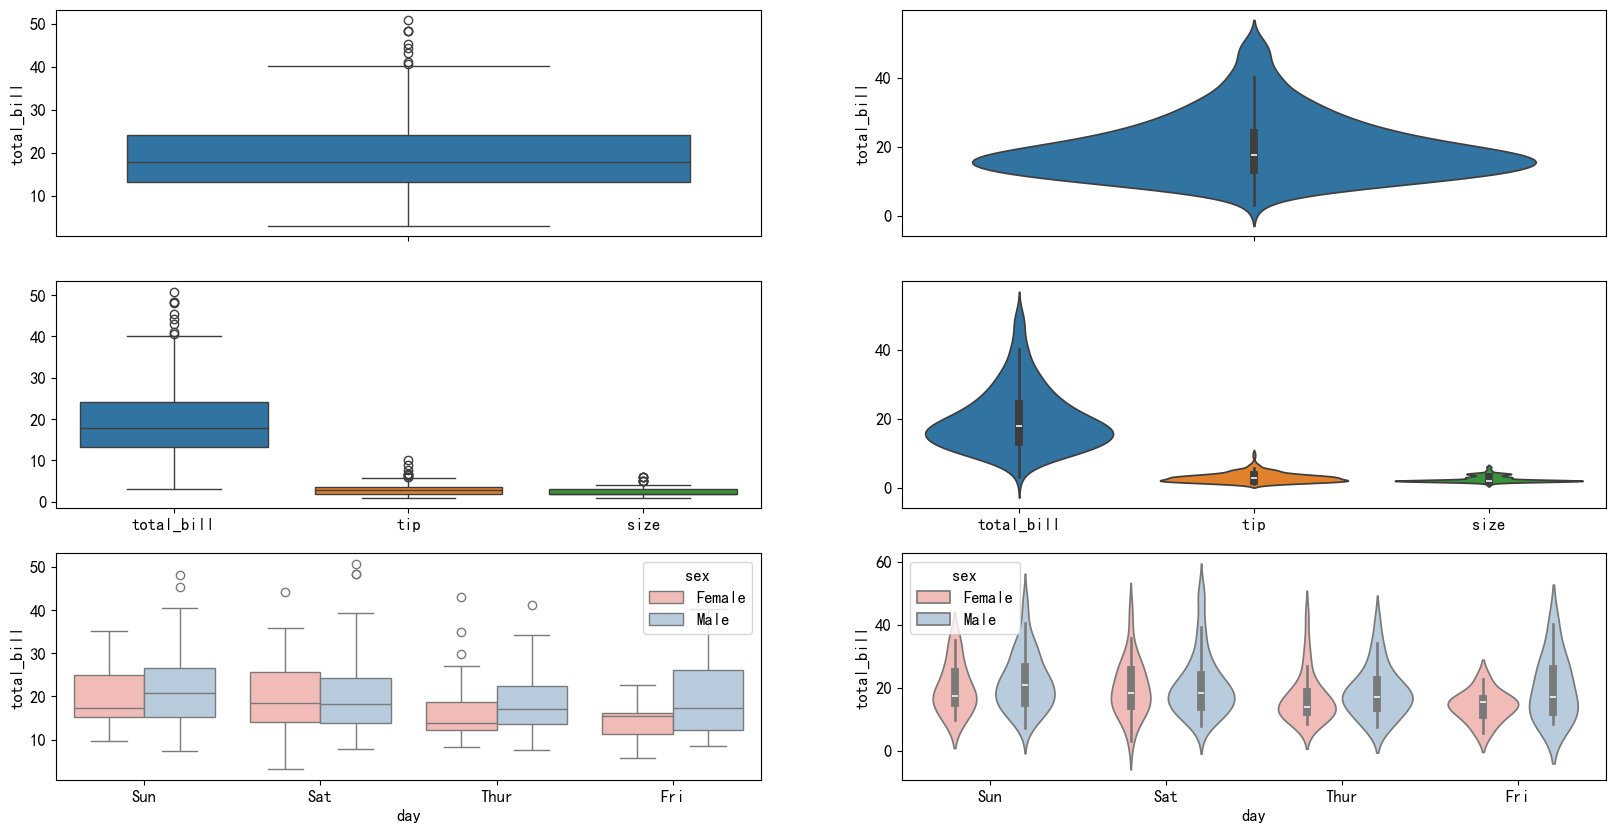

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

sns.boxplot(y="total_bill", data=df, ax=ax[0][0])  
sns.violinplot(y="total_bill", data=df, ax=ax[0][1])  

sns.boxplot(data=df, ax=ax[1][0])  
sns.violinplot(data=df, ax=ax[1][1])

sns.boxplot(x="day", y="total_bill", hue='sex', palette='Pastel1', data=df, ax=ax[2][0])  
sns.violinplot(x="day", y="total_bill", hue='sex', palette='Pastel1', data=df, ax=ax[2][1])

### ***热力图：基于Seaborn***

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'total_bill'), Text(1.5, 0, 'tip'), Text(2.5, 0, 'size')])

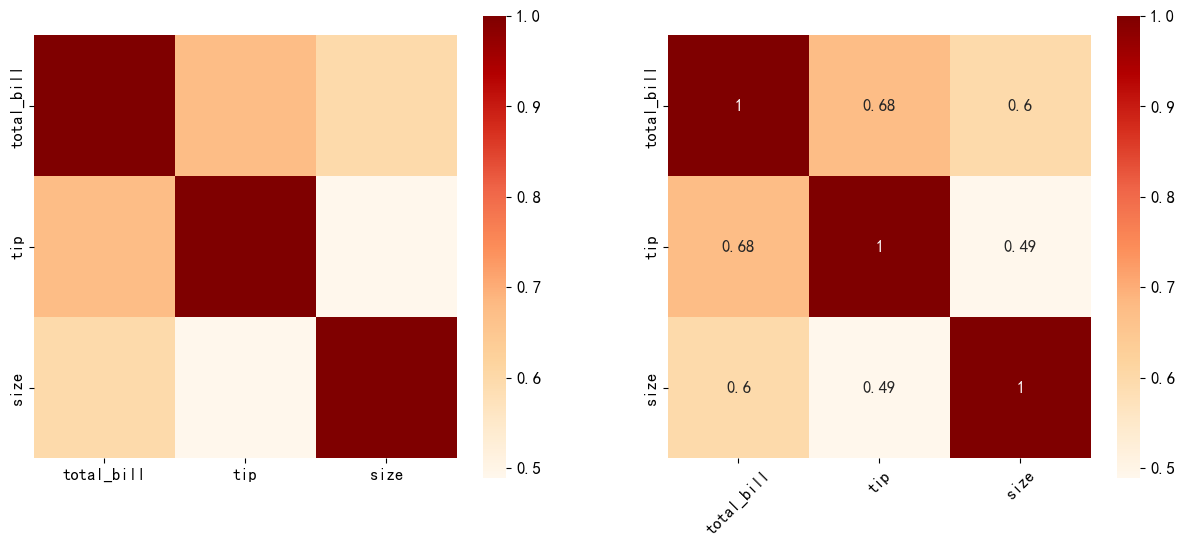

In [15]:
correlation = df[['total_bill', 'tip', 'size']].corr("pearson")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.heatmap(data=correlation, square=True, cmap="OrRd", 
            xticklabels=correlation.columns, yticklabels=correlation.columns, ax=ax[0])

sns.heatmap(data=correlation, annot=True, square=True, cmap="OrRd", 
            xticklabels=correlation.columns, yticklabels=correlation.columns, ax=ax[1])

plt.xticks(rotation = 45)